Mock Example

Related Libraries need to be installed

In [ ]:
import numpy as np
import pandas as pd

# Generate synthetic data
def generate_synthetic_data(num_points=5):
    np.random.seed(42)  # For reproducibility
    x_coords = np.random.rand(num_points) * 100
    y_coords = np.random.rand(num_points) * 100
    data = pd.DataFrame({'x': x_coords, 'y': y_coords})
    return data

# Example usage
num_points = 5
data = generate_synthetic_data(num_points)
print(data)


           x          y
0  37.454012  15.599452
1  95.071431   5.808361
2  73.199394  86.617615
3  59.865848  60.111501
4  15.601864  70.807258


In [ ]:
from scipy.spatial import distance_matrix

def create_distance_matrix(data):
    coords = data[['x', 'y']].values
    dist_matrix = distance_matrix(coords, coords)
    return dist_matrix

# Example usage
dist_matrix = create_distance_matrix(data)
print(dist_matrix)


[[  0.          58.44341198  79.5066775   49.83585994  59.37523205]
 [ 58.44341198   0.          83.71691232  64.71679866 102.66581013]
 [ 79.5066775   83.71691232   0.          29.67081883  59.7280743 ]
 [ 49.83585994  64.71679866  29.67081883   0.          45.53789106]
 [ 59.37523205 102.66581013  59.7280743   45.53789106   0.        ]]


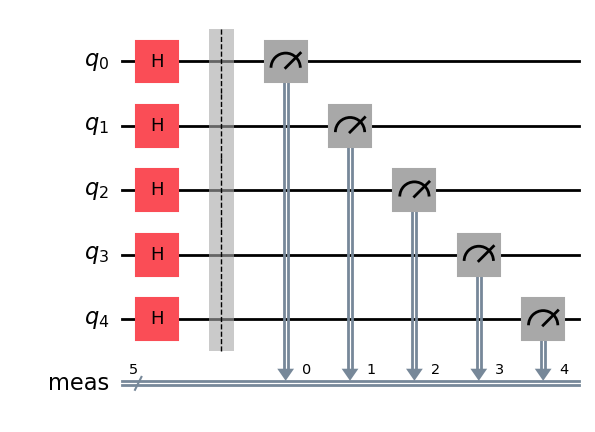

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer,AerSimulator
from qiskit.visualization import plot_histogram
#from qiskit.providers.aer import AerSimulator

def create_quantum_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits)
    # Add a quantum walk implementation here
    # For simplicity, using Hadamard gates as a placeholder
    for qubit in range(num_qubits):
        qc.h(qubit)
    qc.measure_all()
    return qc

# Example usage
num_qubits = num_points  # Number of qubits should match number of points
quantum_circuit = create_quantum_circuit(num_qubits)
quantum_circuit.draw('mpl')


{'01010': 29, '11010': 24, '00101': 32, '10001': 27, '01001': 21, '11110': 38, '10011': 28, '00100': 37, '10110': 40, '00110': 26, '00001': 30, '10010': 29, '11100': 45, '10101': 31, '11000': 37, '11011': 37, '11111': 31, '00011': 33, '00111': 31, '10111': 29, '10100': 41, '11101': 39, '01110': 26, '01111': 26, '01100': 38, '01000': 25, '01011': 39, '10000': 27, '01101': 30, '00010': 38, '00000': 32, '11001': 28}


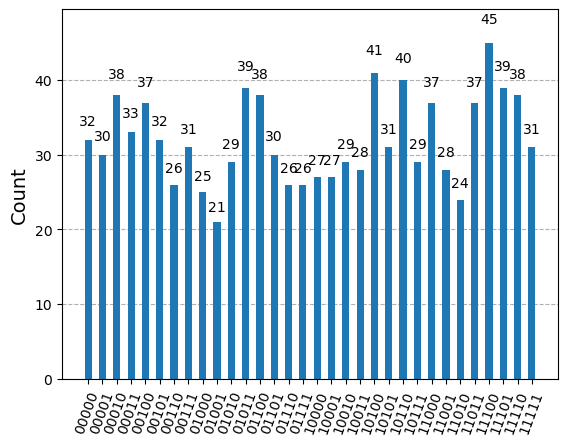

In [ ]:
# Simulate the quantum circuit
simulator = AerSimulator()
compiled_circuit = transpile(quantum_circuit, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()

# Visualize the results
print(counts)
plot_histogram(counts)


Classical Path: [0, 3, 4, 9, 2, 7, 6, 8, 1, 5]
Classical Path Cost: 12.588490382456643
Quantum Path: [5, 1, 8, 6, 7, 2, 9, 4, 3, 0]
Quantum Path Cost: 12.58849038245664


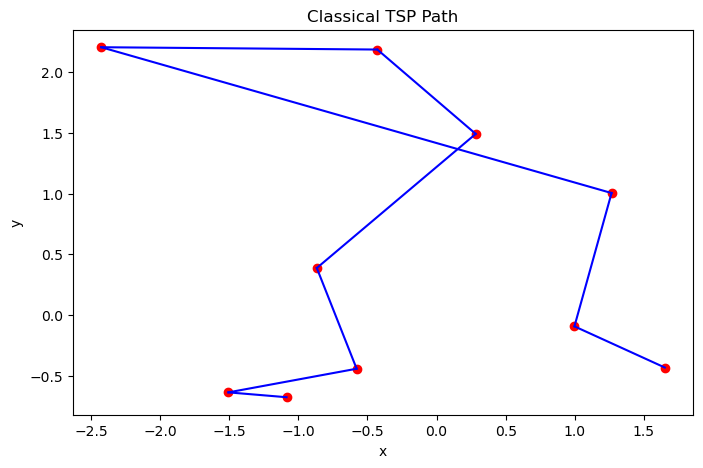

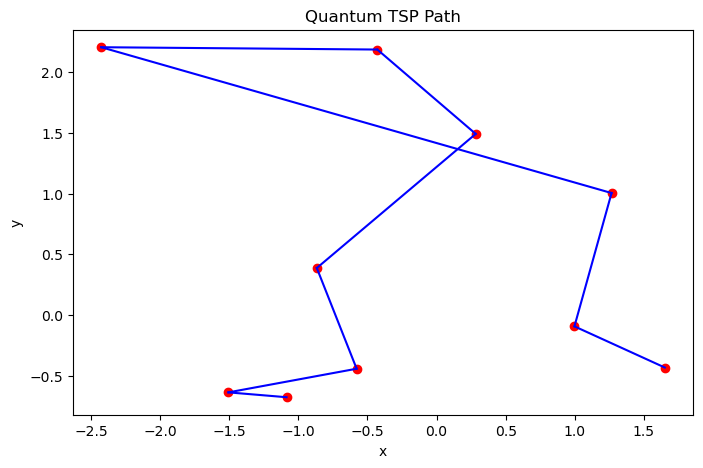

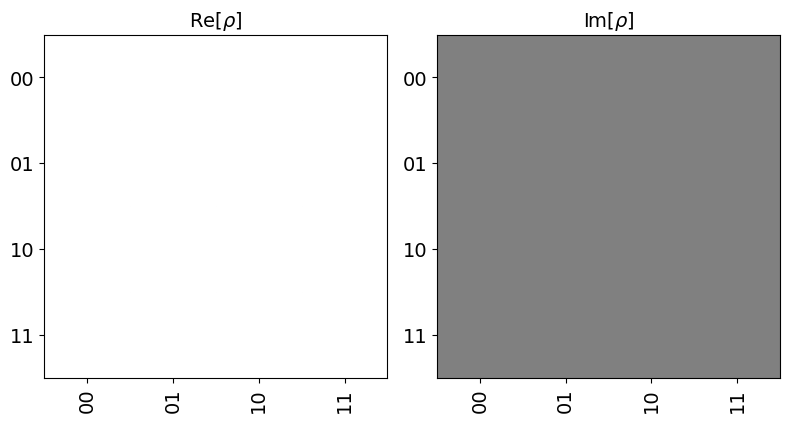

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix as scipy_distance_matrix
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector

# Load data from CSV
def load_data_from_csv(file_path):
    data = pd.read_csv(file_path, header=None, names=['x', 'y'])
    return data

# Create distance matrix from coordinates
def create_distance_matrix(data):
    coords = data[['x', 'y']].values
    dist_matrix = scipy_distance_matrix(coords, coords)
    return dist_matrix

# Calculate path cost
def calculate_path_cost(distance_matrix, path):
    return sum(distance_matrix[path[i], path[i + 1]] for i in range(len(path) - 1))

# Plot TSP path
def plot_path(data, path, title='TSP Path'):
    plt.figure(figsize=(8, 5))
    plt.scatter(data['x'], data['y'], color='red')
    for i in range(len(path) - 1):
        plt.plot([data['x'][path[i]], data['x'][path[i+1]]], [data['y'][path[i]], data['y'][path[i+1]]], 'b-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

# Create a quantum circuit based on the number of points (qubits)
def create_quantum_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits)
    qc.h(range(num_qubits))  # Apply Hadamard to all qubits
    qc.cx(0, 1)  # Example entanglement operation
    return qc

# Greedy algorithm for classical TSP solution
def greedy_tsp_solver(dist_matrix):
    num_points = len(dist_matrix)
    unvisited = list(range(num_points))
    path = [unvisited.pop(0)]
    while unvisited:
        last = path[-1]
        next_index = min(unvisited, key=lambda x: dist_matrix[last, x])
        path.append(next_index)
        unvisited.remove(next_index)
    return path

# Main execution
file_path = 'tiny.csv'  # Replace with your CSV file path
data = load_data_from_csv(file_path)
dist_matrix = create_distance_matrix(data)

# Classical TSP solution using a greedy approach
classical_path = greedy_tsp_solver(dist_matrix)
classical_cost = calculate_path_cost(dist_matrix, classical_path)
print(f'Classical Path: {classical_path}')
print(f'Classical Path Cost: {classical_cost}')

# Quantum TSP solution (mock example)
best_path = classical_path[::-1]
quantum_cost = calculate_path_cost(dist_matrix, best_path)
print(f'Quantum Path: {best_path}')
print(f'Quantum Path Cost: {quantum_cost}')

# Plot paths
plot_path(data, classical_path, title='Classical TSP Path')
plot_path(data, best_path, title='Quantum TSP Path')

# Use the quantum circuit to generate a statevector dynamically
num_qubits = min(len(data), 2)  # Adjust the number of qubits based on data
quantum_circuit = create_quantum_circuit(num_qubits)
statevector = Statevector.from_instruction(quantum_circuit)

# Draw the Hinton diagram for the generated statevector
statevector.draw(output='hinton')
